# Projet Data IA - La Maladie d'Alzheimer
### Léa Bchouty - Chahinez Mezouar - Emma Stievenard

## Préambule

Importer les bibliothèques nécessaires

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import squarify
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('alzheimers_disease_data.csv')

Informations sur les colonnes du data frame

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [67]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Nettoyage du Data Frame

Vérifier que l'on a pas des valeurs NaN

In [68]:
pd.isna(df).sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

Vérifier que l'on a pas de doublons

In [69]:
sum(df.duplicated())

0

Vérifier que l'on a pas des valeurs aberrantes

In [70]:
df.max()

PatientID                          6899
Age                                  90
Gender                                1
Ethnicity                             3
EducationLevel                        3
BMI                           39.992767
Smoking                               1
AlcoholConsumption            19.989293
PhysicalActivity               9.987429
DietQuality                    9.998346
SleepQuality                    9.99984
FamilyHistoryAlzheimers               1
CardiovascularDisease                 1
Diabetes                              1
Depression                            1
HeadInjury                            1
Hypertension                          1
SystolicBP                          179
DiastolicBP                         119
CholesterolTotal             299.993352
CholesterolLDL               199.965665
CholesterolHDL                99.980324
CholesterolTriglycerides     399.941862
MMSE                          29.991381
FunctionalAssessment           9.996467


In [71]:
df.min()

PatientID                          4751
Age                                  60
Gender                                0
Ethnicity                             0
EducationLevel                        0
BMI                           15.008851
Smoking                               0
AlcoholConsumption             0.002003
PhysicalActivity               0.003616
DietQuality                    0.009385
SleepQuality                   4.002629
FamilyHistoryAlzheimers               0
CardiovascularDisease                 0
Diabetes                              0
Depression                            0
HeadInjury                            0
Hypertension                          0
SystolicBP                           90
DiastolicBP                          60
CholesterolTotal             150.093316
CholesterolLDL                50.230707
CholesterolHDL                20.003434
CholesterolTriglycerides      50.407194
MMSE                           0.005312
FunctionalAssessment            0.00046


Supprimer la colonne 'DoctorInCharge' vu qu'on trouve les données inutiles et identiques dans tout le dataframe

In [72]:
df_cleaned = df
df_cleaned.drop('DoctorInCharge', axis = 1, inplace = True)

In [73]:
df_cleaned.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

Sauvegarder tout dans un nouveau fichier CSV

In [74]:
df_cleaned.to_csv('modified_alzheimers_disease_data.csv')

## Analyse des Données

Afficher quelques nombres en statistiques, une analyse descriptive des variables

In [75]:
# Vu que PatientID représente l'identifiant unique de chaque patient, on n'a pas besoin de le garder dans les statistiques, soit calculer la moyenne, la médiane, l'écart-type, le min et le max
df_cleaned.describe().drop('PatientID', axis = 1)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualisation des distributions et tendances

#### Visualisations sur Python

##### Histogramme pour l'âge


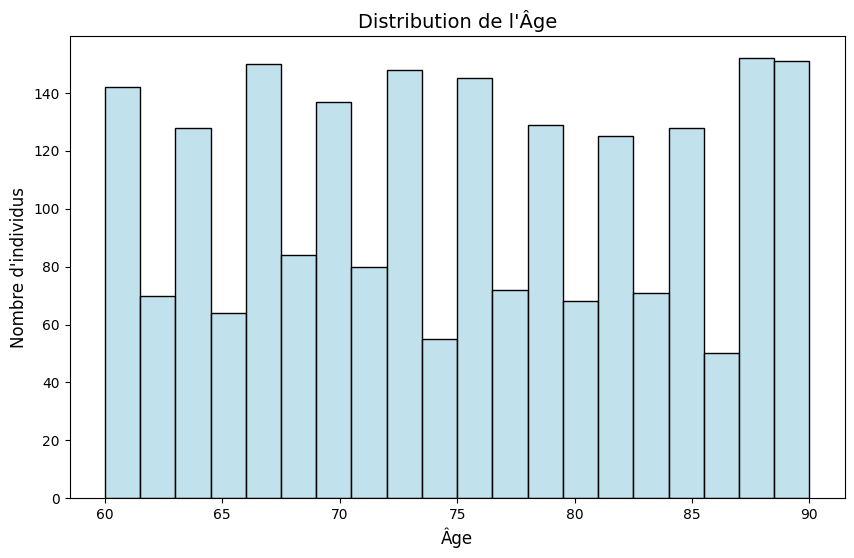

In [76]:
# Création de l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["Age"], bins=20, color="lightblue")

# Ajout des titres et labels
plt.title("Distribution de l'Âge", fontsize=14)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Nombre d'individus", fontsize=12)

# Affichage du graphique
plt.show()


##### Diagramme en barre diagnostiques (1 ou 0)

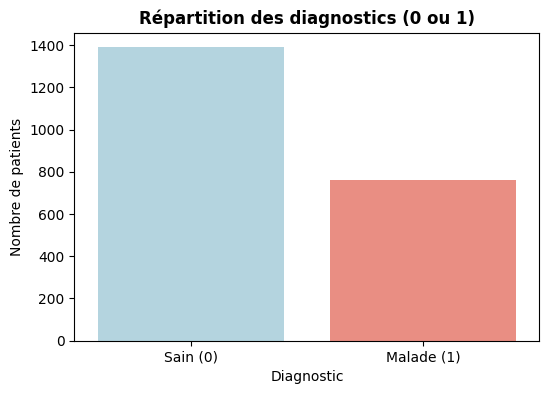

In [77]:

# Compter les valeurs 0 et 1
diagnosis_counts = df_cleaned["Diagnosis"].value_counts()

# Appliquer un style light

# Création du diagramme en barres
plt.figure(figsize=(6, 4))
sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette=["lightblue", "salmon"])

# Ajout des labels et titre
plt.xlabel("Diagnostic", fontsize=10)
plt.ylabel("Nombre de patients", fontsize=10)
plt.title("Répartition des diagnostics (0 ou 1)", fontsize=12, fontweight="bold")
plt.xticks([0, 1], ["Sain (0)", "Malade (1)"])  # Légendes plus claires

# Affichage du graphique
plt.show()


##### Camembert pour la répartition du genre

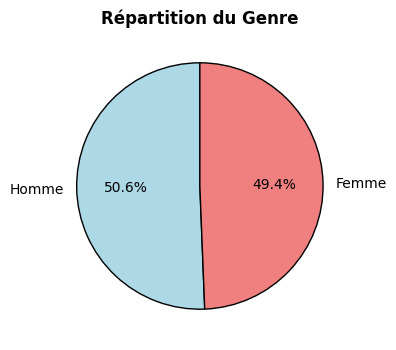

In [78]:
# Compter les occurrences pour chaque genre
gender_counts = df_cleaned["Gender"].value_counts()

# Labels
labels = ["Homme", "Femme"]  # Adapté selon les données (0 = Homme, 1 = Femme par ex.)
colors = ["lightblue", "lightcoral"]  # Couleurs légères

# Création du camembert
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})

# Ajouter un titre
plt.title("Répartition du Genre", fontsize=12, fontweight="bold")

# Afficher le graphique
plt.show()

##### Treemap pour l’ethnicité

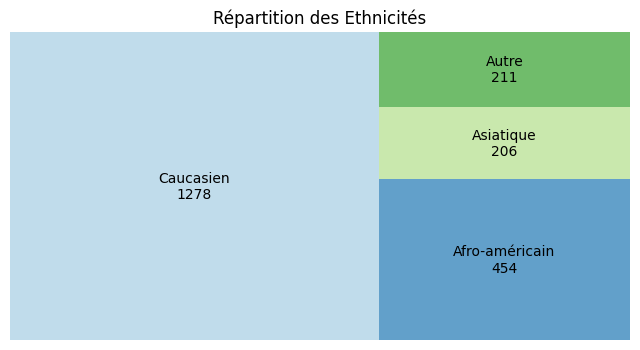

In [79]:
# Mapping des codes à leurs labels
ethnicity_labels = {0: "Caucasien", 1: "Afro-américain", 2: "Asiatique", 3: "Autre"}

# Compter les occurrences de chaque ethnie
ethnicity_counts = df_cleaned["Ethnicity"].value_counts().sort_index()

# Créer des labels avec les noms des groupes et leurs effectifs
labels = [f"{ethnicity_labels[i]}\n{count}" for i, count in zip(ethnicity_counts.index, ethnicity_counts.values)]

# Création du treemap
plt.figure(figsize=(8, 4))
squarify.plot(sizes=ethnicity_counts.values, label=labels, alpha=0.7, color=plt.cm.Paired.colors)

# Ajouter un titre
plt.title("Répartition des Ethnicités")

# Supprimer les axes
plt.axis('off')

# Afficher le graphique
plt.show()

##### Diagramme à barre pour l’éducation


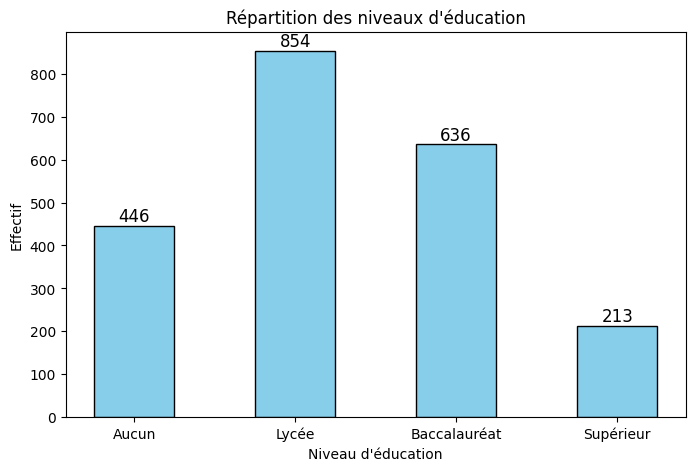

In [80]:
# Mapping des codes à leurs labels
education_labels = {0: "Aucun", 1: "Lycée", 2: "Baccalauréat", 3: "Supérieur"}

# Compter les occurrences de chaque niveau d'éducation
education_counts = df_cleaned["EducationLevel"].value_counts().sort_index()

# Création du diagramme à barres
plt.figure(figsize=(8, 5))
bars = plt.bar([education_labels[i] for i in education_counts.index], education_counts.values, color='skyblue', edgecolor='black',width=0.5)

# Ajouter les étiquettes sur les barres
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom', fontsize=12)

# Ajouter un titre et des labels
plt.title("Répartition des niveaux d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Effectif")

# Afficher le graphique
plt.show()

#### Visualisations sur PowerBI

In [81]:
#pip install powerbiclient

In [82]:
'''from powerbiclient import Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication

import ipywidgets as widgets
import powerbiclient

auth = DeviceCodeLoginAuthentication()

workspace_id = "d6bd1a0a-2d91-49b6-8bc9-dd716bb39a2d"
report_id = "eafd04d6-f19d-4ac4-8dd2-db0ccd10cccd"

report = Report(group_id=workspace_id, report_id=report_id, auth=auth)
report'''



'from powerbiclient import Report\nfrom powerbiclient.authentication import DeviceCodeLoginAuthentication\n\nimport ipywidgets as widgets\nimport powerbiclient\n\nauth = DeviceCodeLoginAuthentication()\n\nworkspace_id = "d6bd1a0a-2d91-49b6-8bc9-dd716bb39a2d"\nreport_id = "eafd04d6-f19d-4ac4-8dd2-db0ccd10cccd"\n\nreport = Report(group_id=workspace_id, report_id=report_id, auth=auth)\nreport'

## Construction des Modèles Prédictifs

### Corrélations entre colonnes

Afficher le nombre de patients non-atteints (0) et atteints (1) de la maladie d'Alzheimer

In [83]:
df_cleaned['Diagnosis'].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

Matrice de corrélation

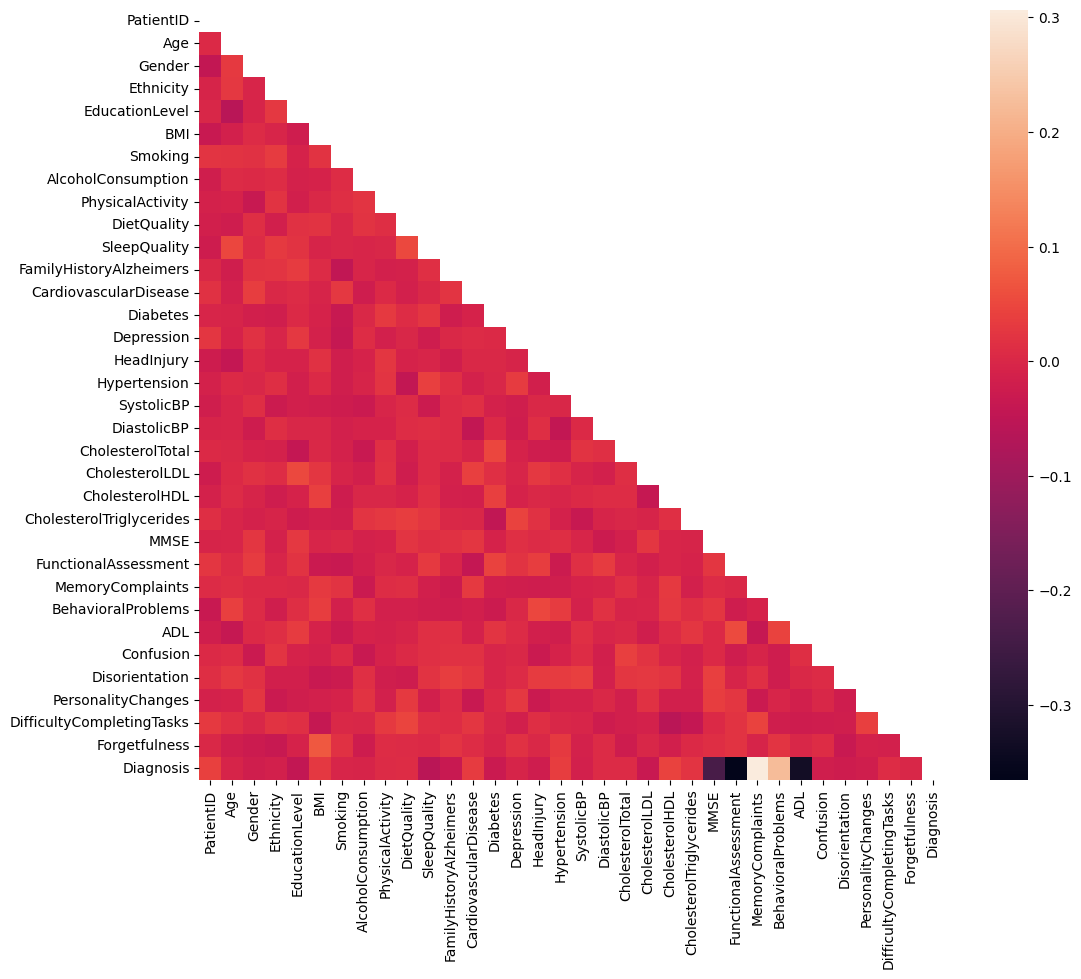

In [84]:
# Créer un mask pour faire apparaitre le triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), mask=mask)

plt.show()

Colonnes avec fortes corrélations

<Axes: >

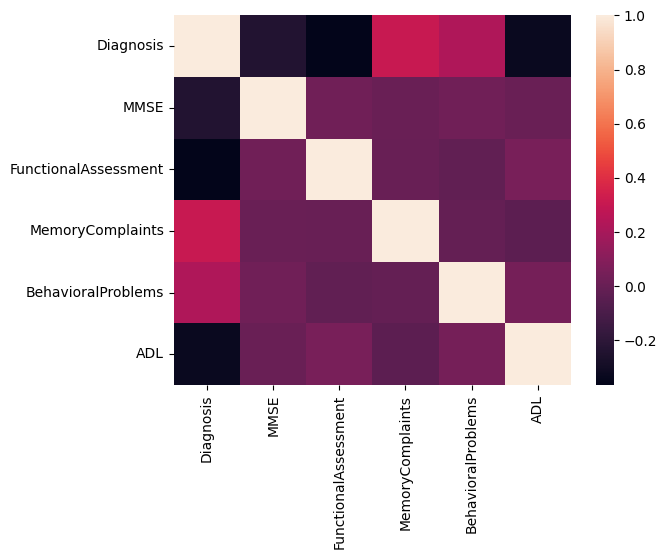

In [85]:
df_heatmap = df_cleaned[['Diagnosis', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']]
sns.heatmap(df_heatmap.corr())

Diviser l'ensemble en x (caractéristiques) et y (variable cible) et indiquer le ratio d'entrainement et de test

In [86]:
x = df.drop(['Diagnosis', 'PatientID'], axis=1)
y = df['Diagnosis']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

Standardiser les variables

In [87]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### K-Nearest Neighbors (KNN)

Méthode de Elbow pour trouver la meilleure valeur de K

In [88]:
error_rate = []

K = 60

for i in range(1, K):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(x_train,y_train)

    pred_i = knn.predict(x_test)

    test_error = 1 - accuracy_score(y_test,pred_i)
    error_rate.append(test_error)

Tracer l'évolution du taux d'erreur en fonction de la valeur de k

Text(0, 0.5, 'Error Rate')

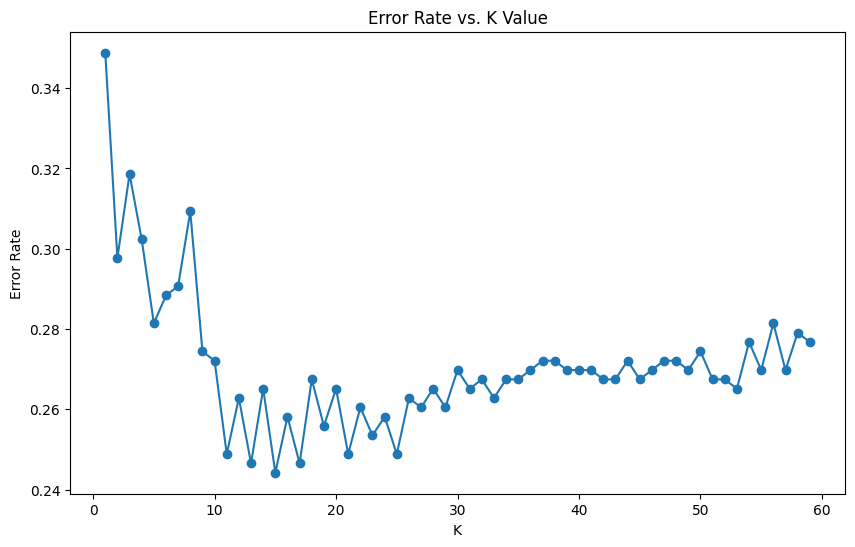

In [89]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate, marker='o')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Utilisation de la meilleure valeur de K

In [90]:
knn = KNeighborsClassifier(n_neighbors = 16)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('Avec K=16')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

Avec K=16


[[266  11]
 [100  53]]


              precision    recall  f1-score   support

           0       0.73      0.96      0.83       277
           1       0.83      0.35      0.49       153

    accuracy                           0.74       430
   macro avg       0.78      0.65      0.66       430
weighted avg       0.76      0.74      0.71       430



### Les arbres de décisions (Decision Tree)

In [91]:
# Decision Tree

dtree = DecisionTreeClassifier(max_depth=3,min_samples_leaf=26)
dtree.fit(x_train, y_train)  # Entraînement du modèle

Tree_Training=dtree.fit(x_train,y_train)
accuracy = dtree.score(x_test, y_test)
print(f"Le taux de précision est : {accuracy}")


Le taux de précision est : 0.8674418604651163


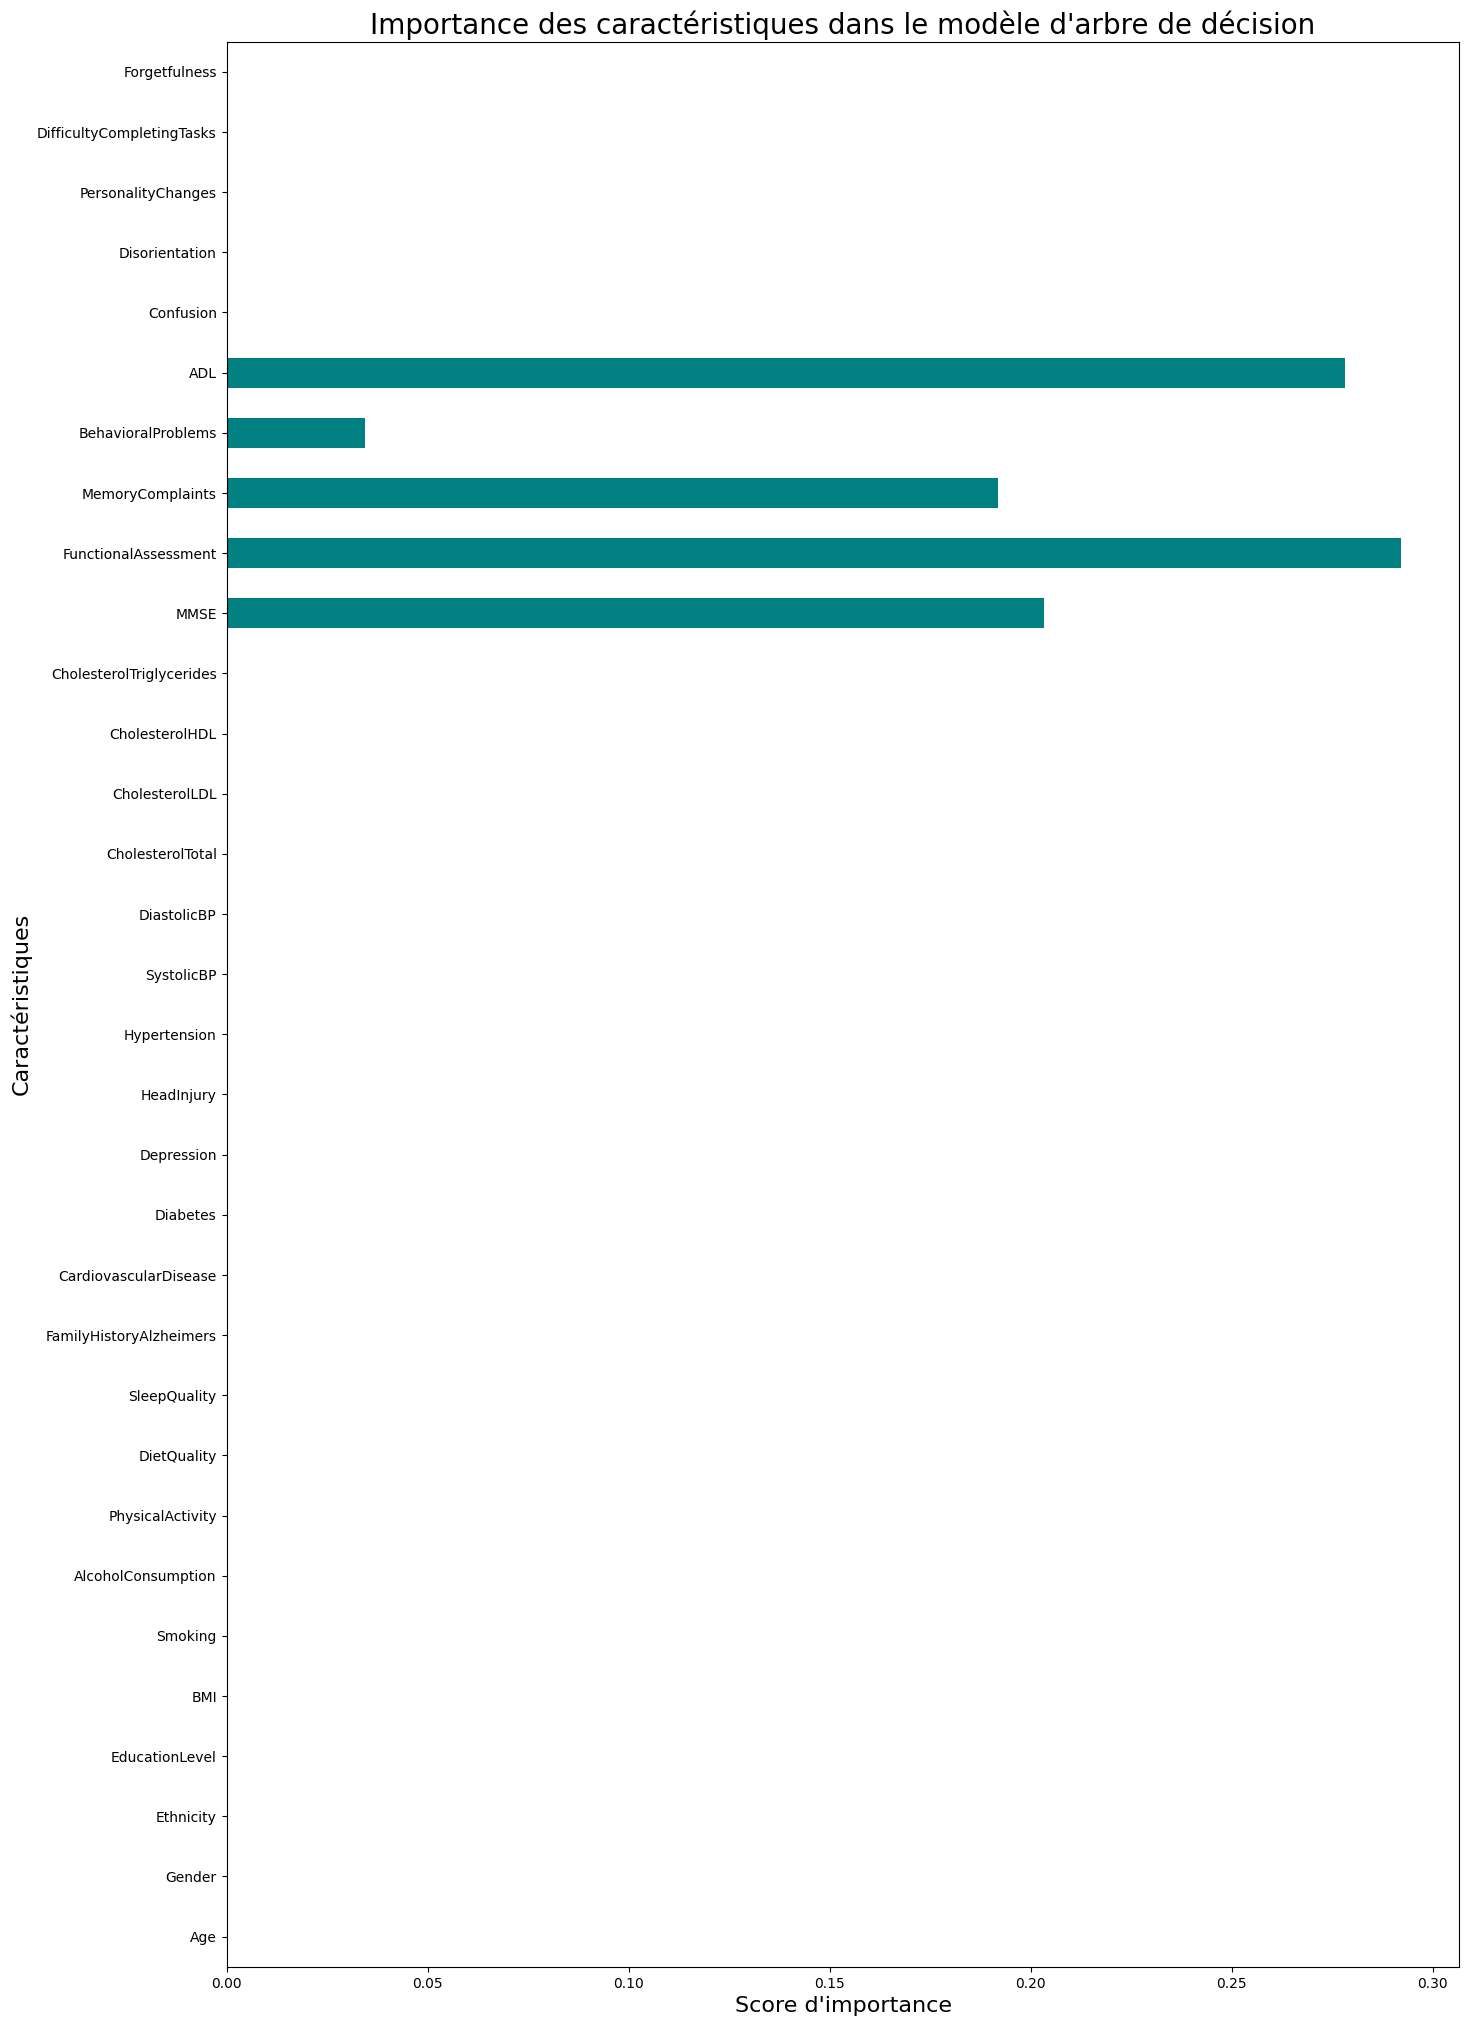

In [92]:
# Visualisation de l'importance des caractéristiques (features) dans le modèle d'arbre de décision.
# Cela permet d'identifier les variables qui influencent le plus les prédictions du modèle pour le diagnostic d'Alzheimer.
# Les caractéristiques avec une importance élevée ont un impact significatif sur les décisions de l'arbre.
fig = plt.figure(figsize = (35,25))
ax = fig.add_subplot(121)
dt = dtree.feature_importances_
impo_dff = pd.Series(dt, x.columns)
impo_dff.plot(color="teal", kind="barh", ax=ax)

ax.set_title("Importance des caractéristiques dans le modèle d'arbre de décision", fontsize=20)
ax.set_xlabel("Score d'importance", fontsize=16)
ax.set_ylabel("Caractéristiques", fontsize=16)

# Afficher le graphique
plt.show()


<Figure size 2000x1000 with 0 Axes>

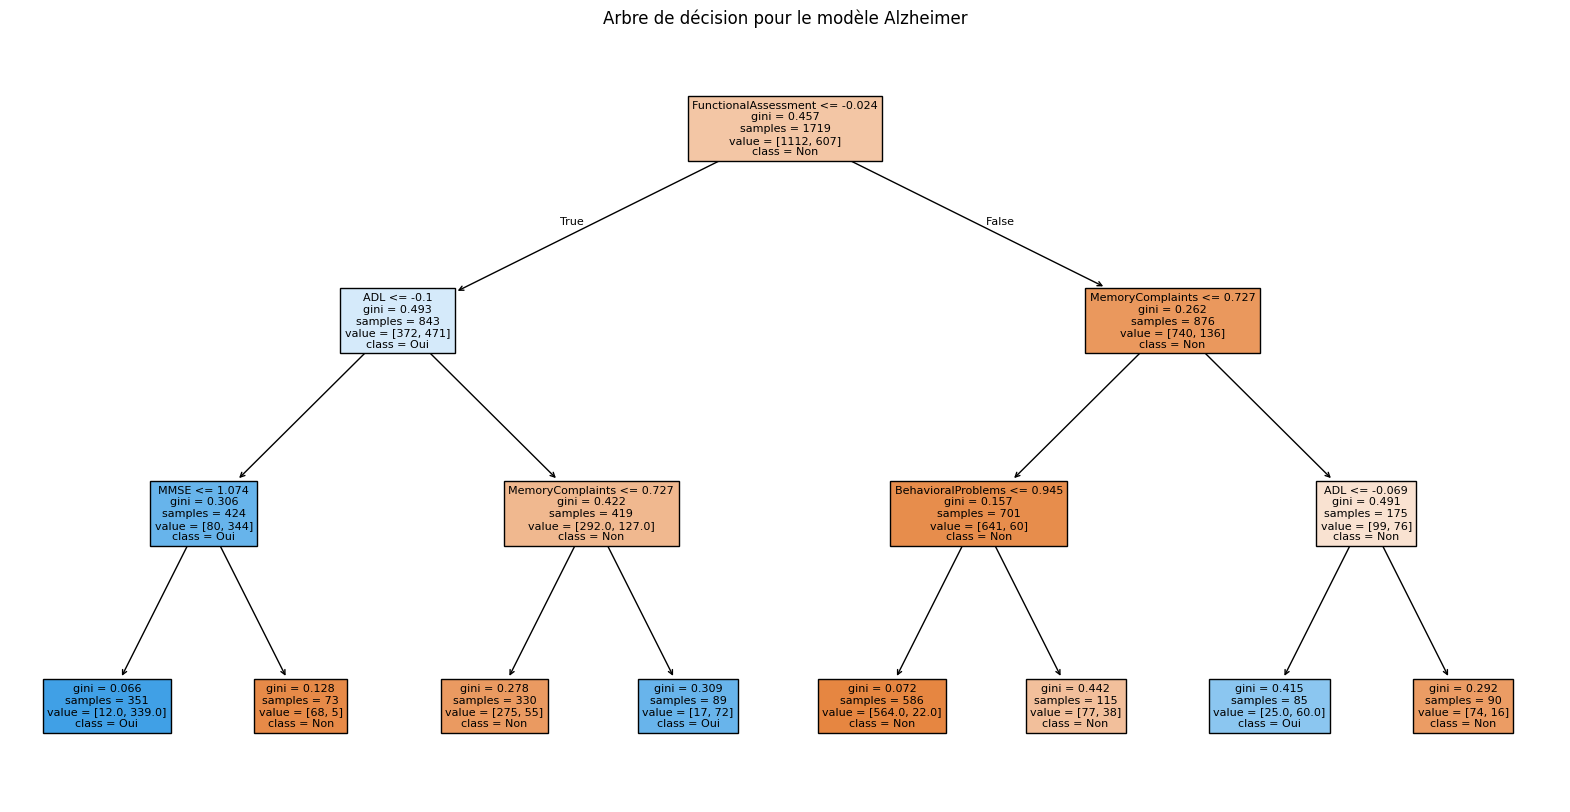

In [93]:

plt.figure(figsize=(20, 10))
# Entraînement du modèle (assure-toi que x_train et y_train sont correctement définis)
dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=26)
dtree.fit(x_train, y_train)

# Affichage de l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=x.columns, class_names=['Non', 'Oui'], filled=True)
plt.title("Arbre de décision pour le modèle Alzheimer")
plt.show()

In [94]:
# Obtenir le nombre de feuilles dans l'arbre de décision.
# Une feuille est un nœud terminal qui représente une prédiction finale.
nombre_feuille = dtree.get_n_leaves()
print(f"Le nombre de feuilles dans l'arbre de décision est : {nombre_feuille}")
# Obtenir la profondeur de l'arbre.
# La profondeur correspond au nombre maximal de niveaux entre la racine et les feuilles.
profondeur = dtree.get_depth()
print(f"La profondeur de l'arbre de décision est : {profondeur}")
# Prédire les probabilités d'appartenance à chaque classe pour les données de test.
# Renvoie un tableau où chaque ligne correspond à un échantillon et chaque colonne à la probabilité
# d'appartenir à une classe donnée (par exemple, [0.8, 0.2] pour 80% de chance d'être dans la classe 0).
prob = dtree.predict_proba(x_test)

# Afficher les 10 premières prédictions de probabilités.
prob[:10]


Le nombre de feuilles dans l'arbre de décision est : 8
La profondeur de l'arbre de décision est : 3


array([[0.96245734, 0.03754266],
       [0.83333333, 0.16666667],
       [0.82222222, 0.17777778],
       [0.96245734, 0.03754266],
       [0.96245734, 0.03754266],
       [0.96245734, 0.03754266],
       [0.03418803, 0.96581197],
       [0.96245734, 0.03754266],
       [0.83333333, 0.16666667],
       [0.03418803, 0.96581197]])

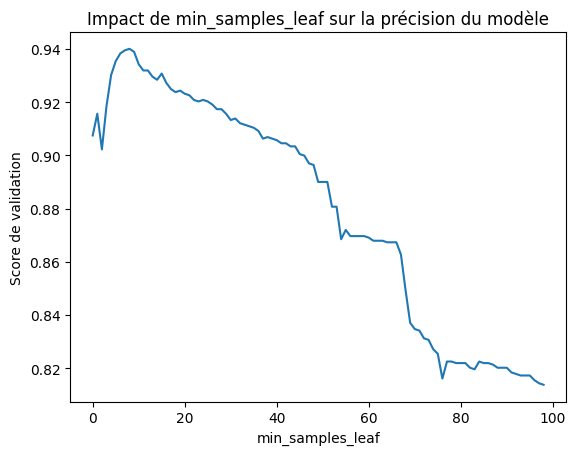

In [95]:
# Crée un modèle d'arbre de décision sans hyperparamètres spécifiques (par défaut).
dtree = DecisionTreeClassifier()

# Effectue une validation croisée à 5 plis (cv=5) pour évaluer la précision du modèle sur les données d'entraînement.
cross_val_score(dtree, x_train, y_train, cv=5, scoring='accuracy')

# Initialise une liste vide pour stocker les scores de validation.
val_score = []

# Boucle sur les valeurs de 1 à 99 pour tester différentes tailles minimales de feuilles (min_samples_leaf).
for k in range(1, 100):
    # Crée un arbre de décision avec une profondeur fixe (max_depth=10) et un nombre variable de feuilles (min_samples_leaf=k).
    model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=k)
    model.fit(x_train, y_train)  # Entraîner le modèle

    # Effectue une validation croisée (5 plis) et calcule la moyenne des scores de précision pour chaque valeur de k.
    score = cross_val_score(model, x_train, y_train, cv=5).mean()
    
    # Ajoute le score obtenu à la liste val_score.
    val_score.append(score)

# Trace un graphe pour visualiser comment le score de validation change selon la valeur de min_samples_leaf.
plt.plot(val_score)
plt.title("Impact de min_samples_leaf sur la précision du modèle")
plt.xlabel("min_samples_leaf")
plt.ylabel("Score de validation")
plt.show()


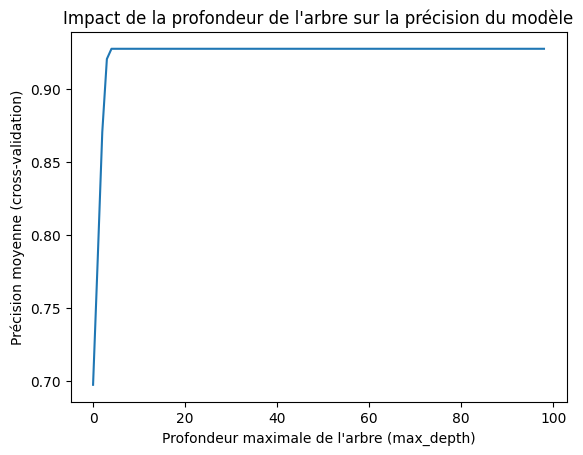

In [96]:
# Initialisation d'une liste vide pour stocker les scores de validation croisée
val_score = []

# Boucle pour tester différentes profondeurs de l'arbre de décision (de 1 à 99)
for k in range(1, 100):
    # Évalue la précision moyenne pour un arbre avec une profondeur maximale k et min_samples_leaf fixé à 17
    score = cross_val_score(DecisionTreeClassifier(max_depth=k, min_samples_leaf=17), x_train, y_train, cv=5).mean()
    
    # Ajoute le score obtenu à la liste val_score
    val_score.append(score)

# Tracer la courbe de précision en fonction de la profondeur de l'arbre
plt.plot(val_score)

# Ajouter un titre et des étiquettes pour les axes
plt.title('Impact de la profondeur de l\'arbre sur la précision du modèle')
plt.xlabel('Profondeur maximale de l\'arbre (max_depth)')
plt.ylabel('Précision moyenne (cross-validation)')

# Afficher le graphique
plt.show()


In [97]:

param_grid = {'max_depth': np.arange(1, 100)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)
grid.best_params_
param_grid = {'min_samples_leaf': np.arange(1, 100)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)
grid.best_params_

{'min_samples_leaf': np.int64(9)}

In [98]:

# Prédictions sur X_test
y_pred = model.predict(x_test)

# Affichage des résultats
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7930232558139535

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       277
           1       0.94      0.44      0.60       153

    accuracy                           0.79       430
   macro avg       0.85      0.72      0.73       430
weighted avg       0.83      0.79      0.77       430



In [99]:
df_results = pd.DataFrame({'Vraie valeur': y_test.values, 'Prédiction': y_pred})
print(df_results.head(10))

   Vraie valeur  Prédiction
0             0           0
1             0           0
2             0           0
3             0           0
4             0           0
5             0           0
6             1           1
7             0           0
8             0           0
9             1           1


### Régression Logistique

Sélectionner le modèle et ses paramètres

In [100]:
regressionmodel = LogisticRegression(C=1.0, max_iter = 100, solver='liblinear')

Cross validation et la validation curve

In [101]:
# Pour avoir des résultats plus précis, on utilise la validation croisée
Logg=LogisticRegression(C=70, max_iter = 100, solver = 'liblinear')
cross_val_score(Logg, x_train, y_train, cv=5, scoring='accuracy')

array([0.81686047, 0.8372093 , 0.86627907, 0.85465116, 0.82215743])

Déterminer le meilleur R-carré

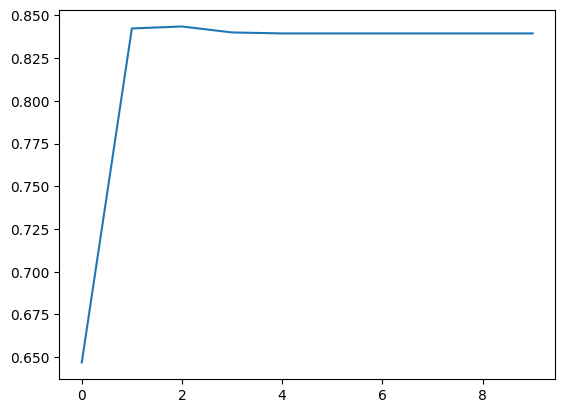

In [102]:
val_score = []
for k in range(0, 10):
    score = cross_val_score(LogisticRegression(C=60, max_iter = k, solver='liblinear'), x_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

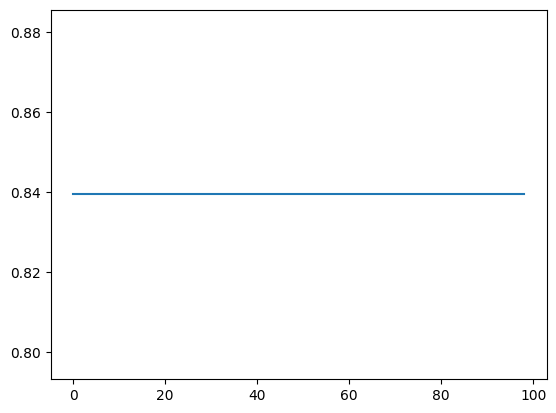

In [103]:
val_score = []
for k in range(1, 100):
    score = cross_val_score(LogisticRegression(C=k, max_iter = 100, solver='liblinear'), x_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

Déterminer la valeur exacte du paramètre C

In [104]:
param_grid = {'C': np.arange(1, 100)}
grid = GridSearchCV(LogisticRegression(max_iter = 100, solver='liblinear'), param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [105]:
grid.best_params_

{'C': np.int64(1)}

Apprentissage et résultats

In [106]:
model = LogisticRegression(C=1, max_iter = 100, solver='liblinear')
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [107]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7930232558139535

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       277
           1       0.94      0.44      0.60       153

    accuracy                           0.79       430
   macro avg       0.85      0.72      0.73       430
weighted avg       0.83      0.79      0.77       430



### Random Forest

In [108]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Chargement des données
df = pd.read_csv("modified_alzheimers_disease_data.csv")

# Définition des variables explicatives et de la cible
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

In [109]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement du modèle
treemodel = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(x_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [110]:
from sklearn.metrics import classification_report, confusion_matrix

# Prédiction
pred_forest = model.predict(x_test)

# Affichage des métriques
print(classification_report(y_test, pred_forest))


              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.79      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialisation et entraînement du modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(x_test)

# Calcul du coefficient de détermination R²
r2 = r2_score(y_test, y_pred)
print(f"Coefficient de détermination R² : {r2:.4f}")

Coefficient de détermination R² : 0.7696


### Support Vector Machine

In [112]:
# Importation du classifieur SVM
from sklearn.svm import SVC

# Initialisation du modèle SVM avec C=4, gamma=1 et activation des probabilités
svm = SVC(C=1, gamma='scale', probability=True)

# Entraînement du modèle sur les données d'entraînement
svm.fit(x_train, y_train)

# Prédiction sur les données de test
pred_svm = model.predict(x_test)


# Évaluation de la précision du modèle sur les données de test
svm.score(x_test, y_test)


0.8325581395348837

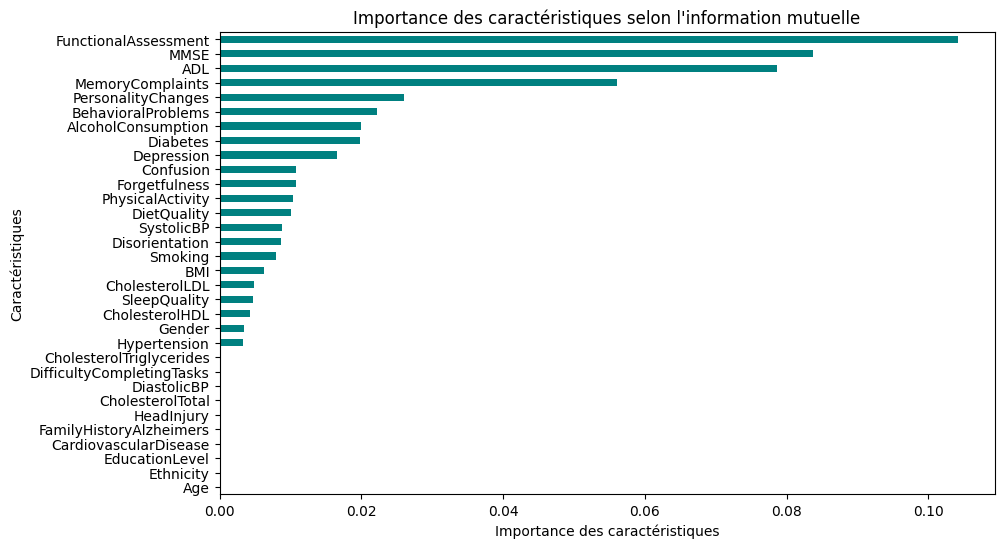

In [113]:
# Importation de la méthode pour mesurer l'importance des caractéristiques
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Calcul de l'information mutuelle entre chaque feature et la classe cible
imp = mutual_info_classif(x_train, y_train)

# Création de la série pandas pour les importances
pl = pd.Series(imp, index=x.columns)

# Définir la taille du graphique
plt.figure(figsize=(10, 6))

# Trier la série par ordre décroissant
pl_sorted = pl.sort_values(ascending=True)

# Tracé du graphique en barres horizontales
pl_sorted.plot(kind="barh", color="teal")

# Ajout des labels et du titre
plt.xlabel('Importance des caractéristiques')
plt.ylabel('Caractéristiques')
plt.title('Importance des caractéristiques selon l\'information mutuelle')

# Affichage du graphique
plt.show()


In [114]:
# Importation du modèle pour calibrer les probabilités des prédictions SVM
from sklearn.calibration import CalibratedClassifierCV

# Calibration du modèle SVM pour obtenir des probabilités plus précises
model = CalibratedClassifierCV(svm)
model.fit(x_train, y_train)


CalibratedClassifierCV(estimator=SVC(C=1, probability=True))

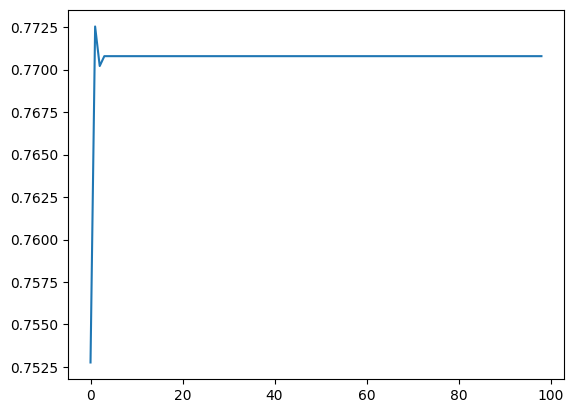

In [115]:
# Test de différentes valeurs de C pour voir l'impact sur la précision
val_score = []
for k in range(1, 100):
    score = cross_val_score(SVC(C=k, gamma=0.1), x_train, y_train, cv=5).mean()
    val_score.append(score)

# Affichage du graphe des scores selon la valeur de C
plt.plot(val_score)

In [116]:
# Prédiction sur les données de test (classes discrètes)
y_pred = model.predict(x_test)  # Assurez-vous que cela retourne bien des classes

# Vérification des valeurs de y_pred
print("Valeurs uniques de y_pred :", set(y_pred))

# Affichage des métriques
print(classification_report(y_test, y_pred))


Valeurs uniques de y_pred : {np.int64(0), np.int64(1)}
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       277
           1       0.80      0.71      0.75       153

    accuracy                           0.83       430
   macro avg       0.82      0.80      0.81       430
weighted avg       0.83      0.83      0.83       430



### XGBoost Classifier

In [117]:
#pip install xgboost

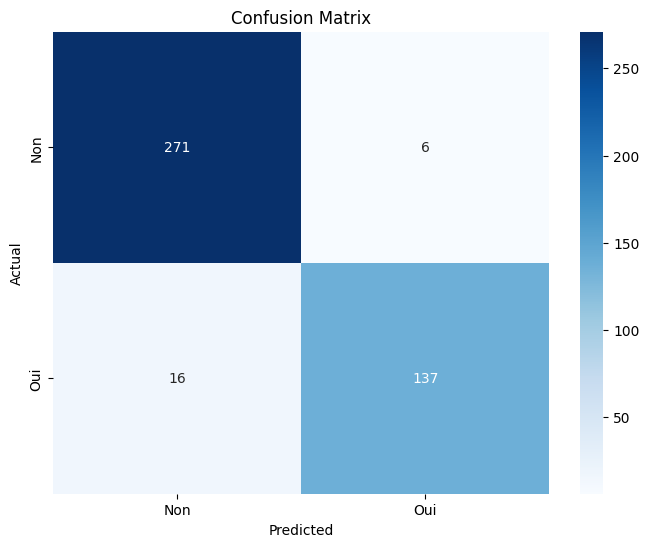


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



In [118]:
from xgboost import XGBClassifier

# Initialiser le classifieur XGBoost
xgb = XGBClassifier(random_state=42)

# Entrainer le modèle
xgb.fit(x_train, y_train)

# Faire des prédictions
pred_xgb = xgb.predict(x_test)

# Evaluer le modèle
cm = confusion_matrix(y_test, pred_xgb)

# Faire la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non', 'Oui'], yticklabels=['Non', 'Oui'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, pred_xgb))

## Réstitution des modèles

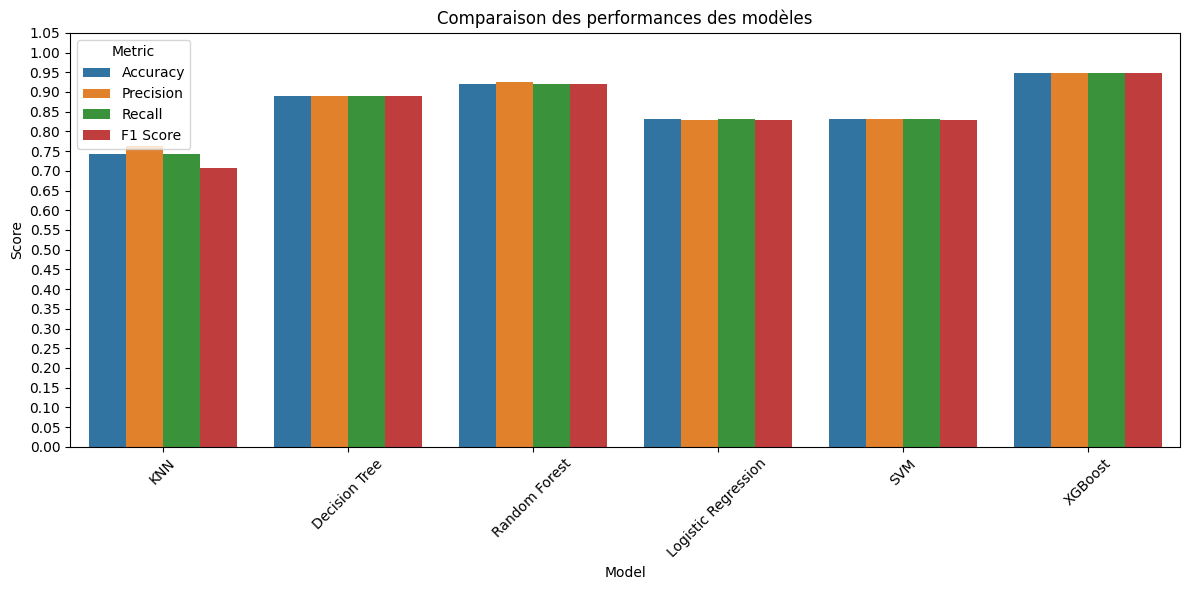

In [124]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


knn.fit(x_train, y_train)
dtree.fit(x_train, y_train)
treemodel.fit(x_train, y_train)
regressionmodel.fit(x_train, y_train)
svm.fit(x_train, y_train)
xgb.fit(x_train, y_train)


models_dict = {
    'KNN': knn,
    'Decision Tree': dtree,
    'Random Forest': treemodel,
    'Logistic Regression': regressionmodel,
    'SVM': svm,
    'XGBoost': xgb
}


results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for name, model in models_dict.items():
    y_pred = model.predict(x_test)
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    results['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))


results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

df_melted = results_df.melt(id_vars=['Model'], value_vars=metrics, var_name='Metric', value_name='Score')

sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.xticks(rotation=45)
plt.title('Comparaison des performances des modèles')

plt.yticks(np.arange(0, 1.1, 0.05))

plt.tight_layout()
plt.show()
plt.close()